In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv("laptop_prices.csv")
data

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83
...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,Intel i3,4,2TB SSD,Nvidia RTX 2060,17.3,1366x768,11.5,1.58,macOS,704.82
11764,Asus,Intel i3,4,2TB SSD,AMD Radeon RX 6800,16.0,1366x768,9.5,2.14,Linux,775.59
11765,Razer,AMD Ryzen 9,4,2TB SSD,AMD Radeon RX 6600,15.6,2560x1440,8.2,2.05,Linux,2789.46
11766,Samsung,AMD Ryzen 7,16,512GB SSD,Integrated,13.3,1920x1080,7.5,1.48,macOS,1067.13


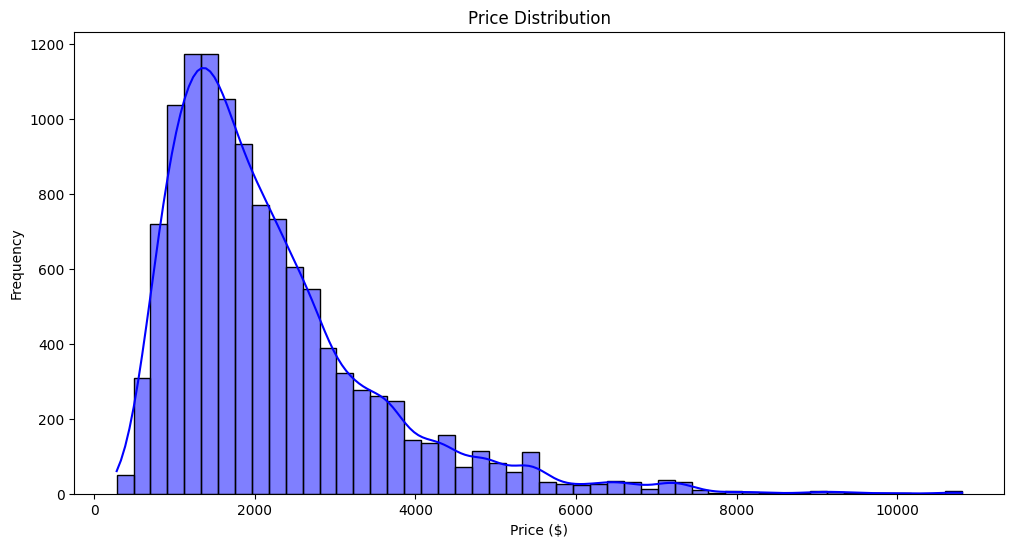

In [3]:

plt.figure(figsize=(12, 6))
sns.histplot(data['Price ($)'], bins=50, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

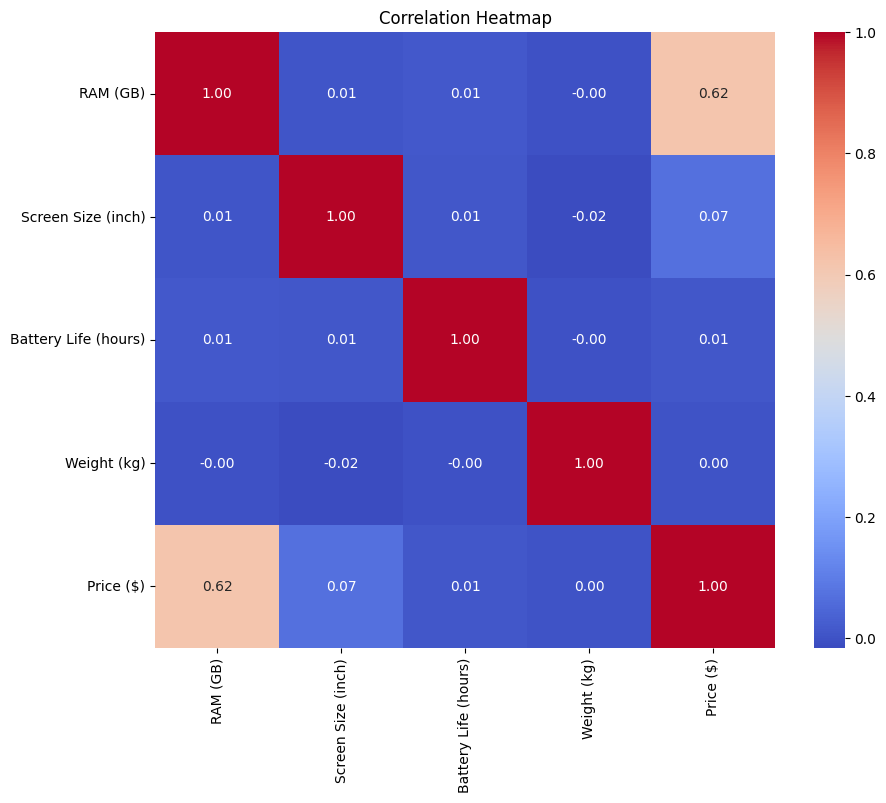

In [4]:
plt.figure(figsize=(10, 8))
numerical_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

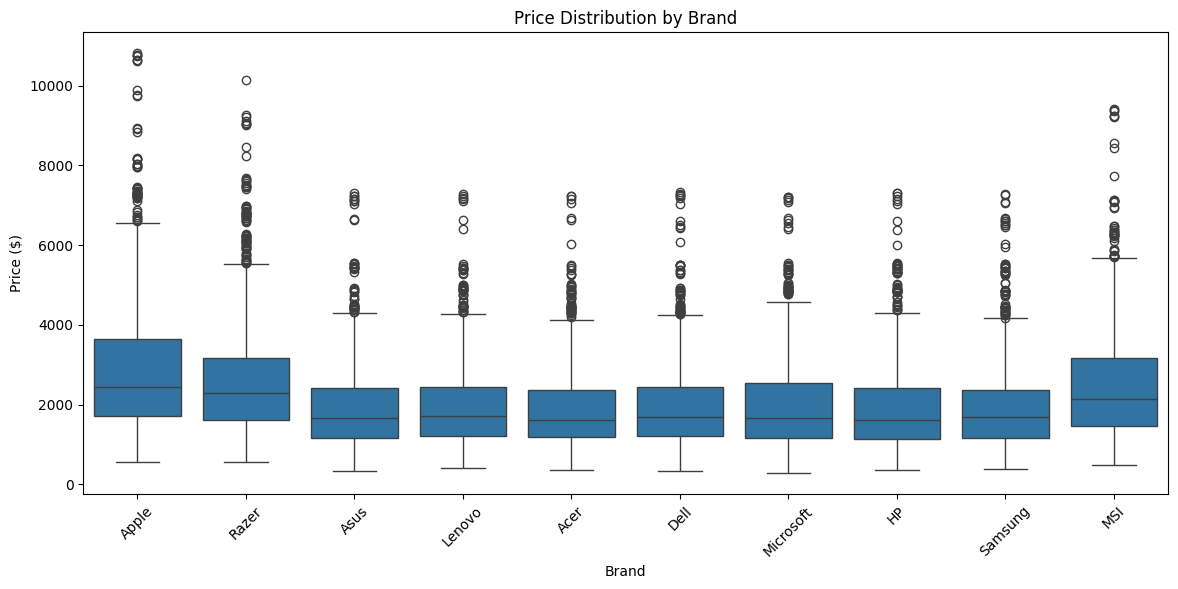

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Brand', y='Price ($)', data=data)
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand')
plt.show()

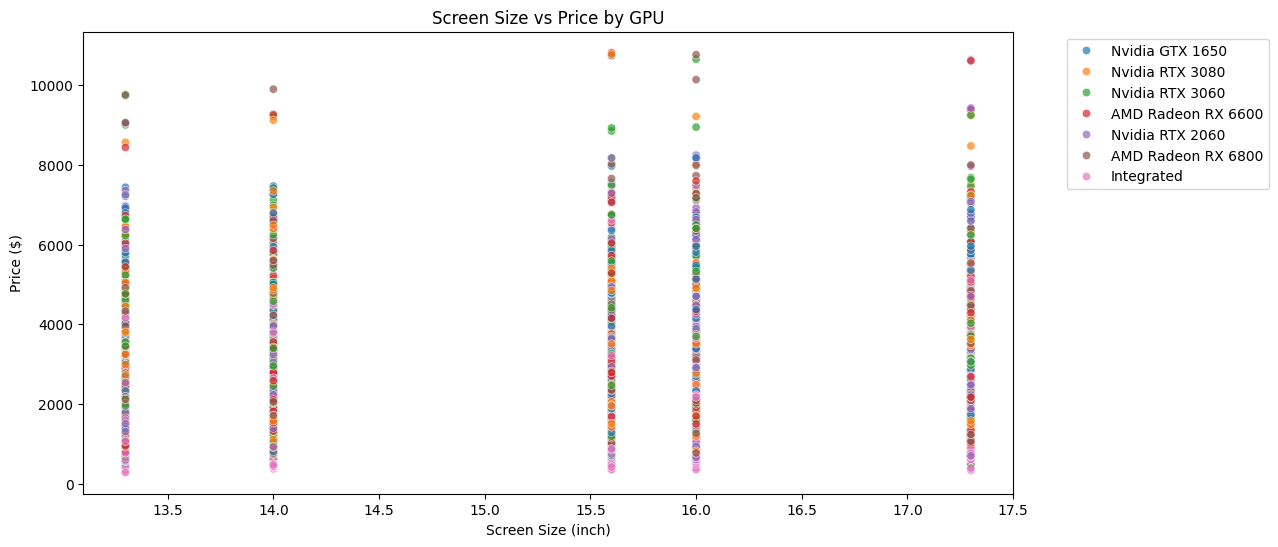

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Screen Size (inch)', y='Price ($)', hue='GPU', data=data, palette='tab10', alpha=0.7)
plt.title('Screen Size vs Price by GPU')
plt.xlabel('Screen Size (inch)')
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

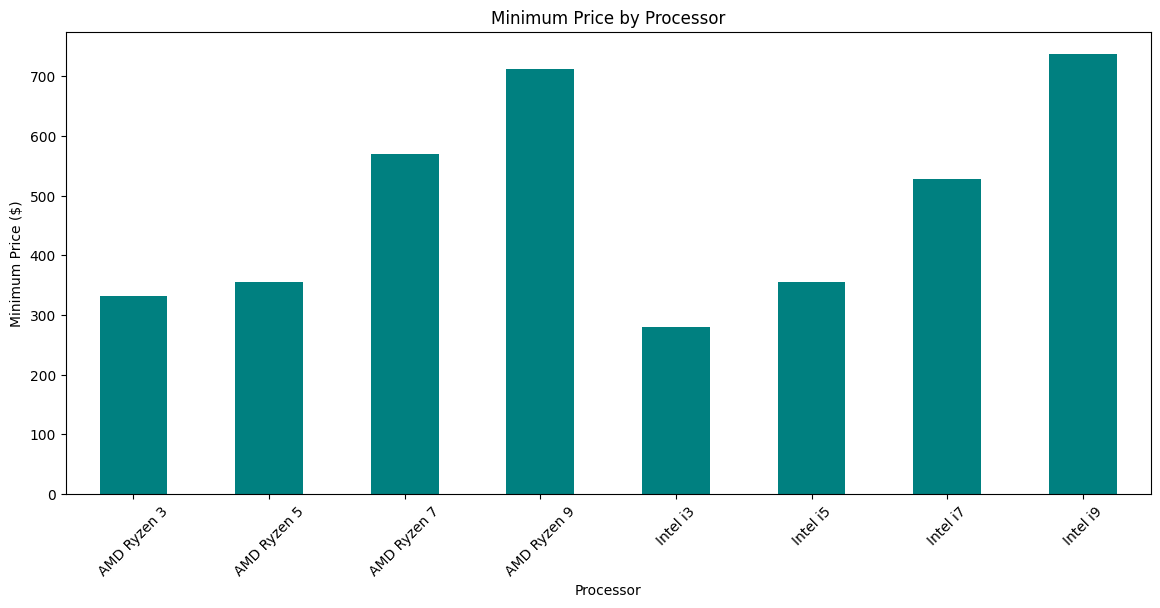

In [7]:
plt.figure(figsize=(14, 6))
data.groupby('Processor')['Price ($)'].min().plot(kind='bar', color='teal')
plt.title('Minimum Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Minimum Price ($)')
plt.xticks(rotation=45)
plt.show()

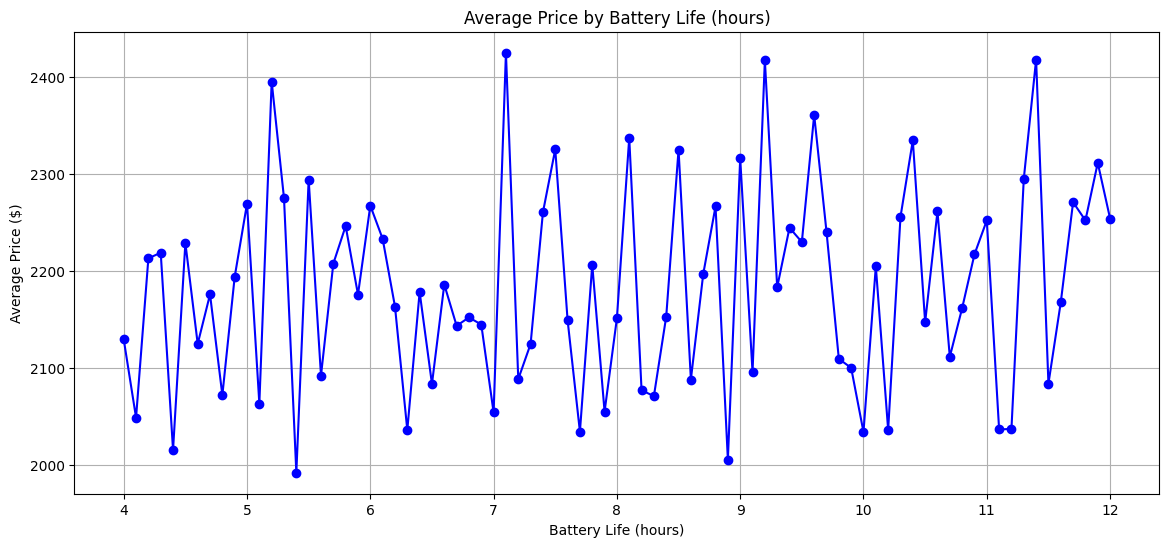

In [8]:
plt.figure(figsize=(14, 6))
data.groupby('Battery Life (hours)')['Price ($)'].mean().plot(kind='line', color='blue', marker='o')
plt.title('Average Price by Battery Life (hours)')
plt.xlabel('Battery Life (hours)')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.show()

In [9]:
data['Resolution'].value_counts()

Resolution
3840x2160    2977
1366x768     2932
1920x1080    2930
2560x1440    2929
Name: count, dtype: int64

In [10]:
categorical_features = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']
numerical_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)']

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = encoder.fit_transform(data[categorical_features])

# Standardize numerical variables
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(data[numerical_features])

# Combine preprocessed features
X = np.hstack((numerical_scaled, categorical_encoded))
y = data['Price ($)'].values

In [11]:
print(X.shape)
X[0]

(11768, 36)


array([ 1.79890734,  1.45288028,  0.3783212 , -1.37913943,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [12]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Linear Regression model
LR_Sci = LinearRegression()
LR_Sci.fit(X_train, y_train)

LinearRegression()

In [13]:
LR_Sci.intercept_, LR_Sci.coef_

(np.float64(465.8023762909902),
 array([ 8.17250963e+02,  8.54219601e+01,  3.60329649e+00, -4.82981121e+00,
         9.77223578e+02,  1.08899026e+01,  7.68873806e+00,  2.92986361e+01,
        -1.63368526e+01,  5.91768804e+02,  1.72694233e+01,  7.75178399e+02,
         1.71615749e+01,  3.06420628e+02,  7.29220266e+02,  1.50743118e+03,
        -2.41700981e+01,  2.88169542e+02,  7.33614350e+02,  1.48970213e+03,
         3.76734549e+02,  3.74634275e+02,  3.72508433e+02,  3.62506480e+02,
         2.49573660e+01, -6.82647117e+02,  3.05803997e+01,  1.86213263e+01,
         1.27501577e+01,  1.30059692e+01,  2.87339664e+02,  7.42378098e+02,
         1.47717028e+03,  7.40027839e+00, -4.39744828e-01,  7.72086661e-01]))

In [14]:

# Predict and evaluate
y_pred = LR_Sci.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 213594.64
R-squared: 0.88


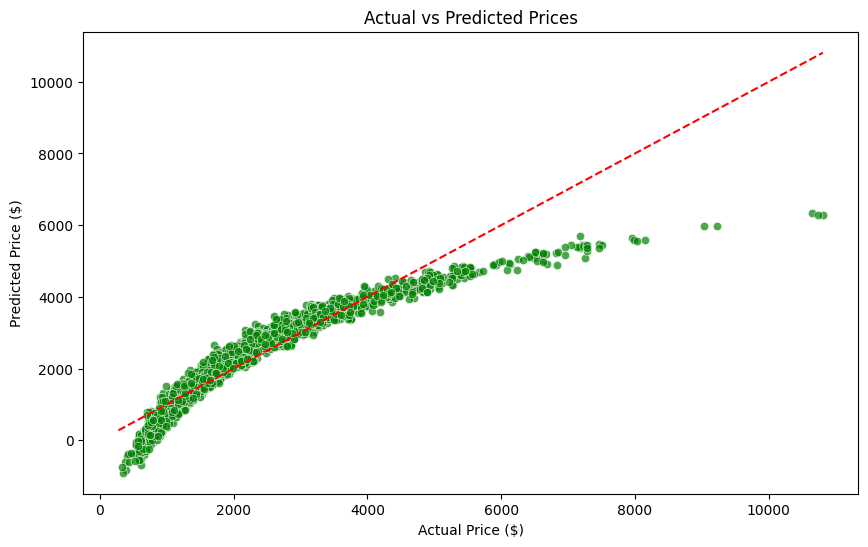

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')
plt.show()

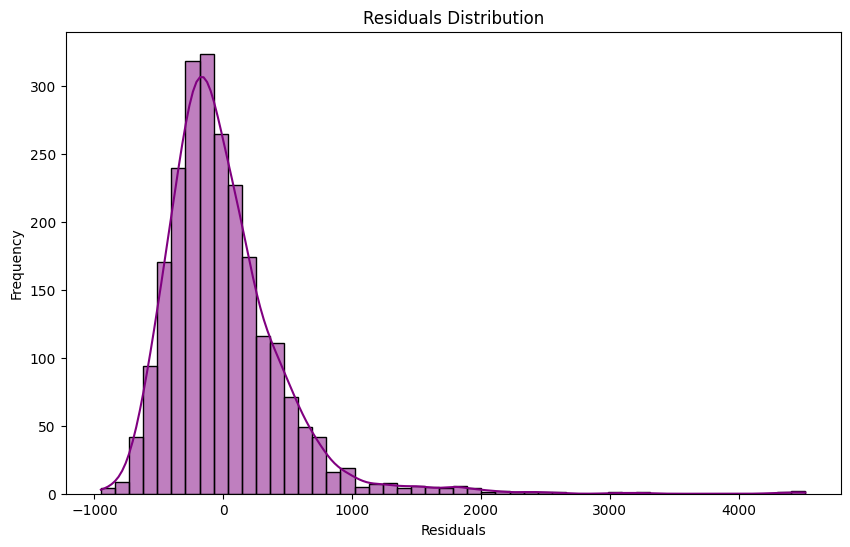

In [16]:
# Residual Plot
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Tasks:

Use the training set (X_train, y_train) to train a linear regression model using the following:

- Your previous implementation of gradient descent (batch).
- Implementation of batch gradient descent with Ridge regularization.
- Implementation of batch gradient descent with Lasso regularization.
- Implementation of batch gradient descent with ElasticNet regularization.

Then using the 4 models obtained above in the validation set (X_val, y_val), compute the following metrics with your own implementation (compare your results with those obtained with sklearn):

- MSE
- MSLE
- Max Error
- MedAE
- MAE
- MAPE
- Explained Variance Score
- $R^2$

### Data Pre-processing

In [17]:
# ===== Data
data = pd.read_csv("laptop_prices.csv")
categorical_features = ['Brand', 'Processor', 'Storage', 'GPU', 'Resolution', 'Operating System']
numerical_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)']
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = encoder.fit_transform(data[categorical_features])
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(data[numerical_features])
X = np.hstack((numerical_scaled, categorical_encoded))
y = data['Price ($)'].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Creación de 4 clases para cada modelo diferente

In [18]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.theta = None  # Parámetros del modelo
    
    def fit(self, X, y):
        """ Entrena el modelo usando Gradient Descent sin regularización """
        m, n = X.shape
        self.theta = np.zeros(n)  # Inicializa los parámetros en 0
        
        for _ in range(self.iterations):
            gradients = (1 / m) * X.T.dot(X.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients  # Actualización de parámetros
        
        return self
    
    def predict(self, X):
        """ Predice valores para nuevas entradas """
        return X.dot(self.theta)

In [19]:
class GradientDescentRidge:
    def __init__(self, learning_rate=0.01, iterations=1000, alpha=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha  # Parámetro de regularización
        self.theta = None  # Parámetros del modelo
    
    def fit(self, X, y):
        """ Entrena el modelo usando Gradient Descent con Ridge Regularization """
        m, n = X.shape
        self.theta = np.zeros(n)  # Inicializa los parámetros en 0
        
        for _ in range(self.iterations):
            gradients = (1 / m) * X.T.dot(X.dot(self.theta) - y) + (self.alpha / m) * np.r_[[0], self.theta[1:]]
            self.theta -= self.learning_rate * gradients  # Actualización de parámetros
        
        return self
    
    def predict(self, X):
        """ Predice valores para nuevas entradas """
        return X.dot(self.theta)

In [20]:
class GradientDescentLasso:
    def __init__(self, learning_rate=0.01, iterations=1000, alpha=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha
        self.theta = None
    
    def fit(self, X, y):
        """ Entrena el modelo usando Gradient Descent con Lasso Regularization """
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for _ in range(self.iterations):
            gradients = (1 / m) * X.T.dot(X.dot(self.theta) - y) + (self.alpha / m) * np.sign(self.theta)
            self.theta -= self.learning_rate * gradients
        
        return self
    
    def predict(self, X):
        return X.dot(self.theta)

In [21]:
class GradientDescentElasticNet:
    def __init__(self, learning_rate=0.01, iterations=1000, alpha=0.1, l1_ratio=0.5):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.theta = None
    
    def fit(self, X, y):
        """ Entrena el modelo usando Gradient Descent con ElasticNet Regularization """
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for _ in range(self.iterations):
            ridge_component = (1 - self.l1_ratio) * self.theta
            lasso_component = self.l1_ratio * np.sign(self.theta)
            gradients = (1 / m) * X.T.dot(X.dot(self.theta) - y) + (self.alpha / m) * (ridge_component + lasso_component)
            self.theta -= self.learning_rate * gradients
        
        return self
    
    def predict(self, X):
        return X.dot(self.theta)

### Creacion de Clase para metricas

In [22]:

class Metrics2Evaluate:
    def __init__(self,y_true,y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def mse(self):
        """
        Calcula el Mean Squared Error (MSE).
        """
        return np.mean((self.y_true - self.y_pred) ** 2)

    def msle(self):
        """
        Calcula el Mean Squared Logarithmic Error (MSLE) usando np.log1p.
        Se recorta a 0 los valores negativos para evitar logaritmos de números negativos.
        """
        y_true_clipped = np.clip(self.y_true, 0, None)
        y_pred_clipped = np.clip(self.y_pred, 0, None)
        return np.mean((np.log1p(y_true_clipped) - np.log1p(y_pred_clipped)) ** 2)

    def max_error(self):
        """
        Calcula el error máximo (Max Error).
        """
        return np.max(np.abs(self.y_true - self.y_pred))

    def medae(self):
        """
        Calcula el Median Absolute Error (MedAE).
        """
        return np.median(np.abs(self.y_true - self.y_pred))

    def mae(self):
        """
        Calcula el Mean Absolute Error (MAE).
        """
        return np.mean(np.abs(self.y_true - self.y_pred))

    def mape(self):
        """
        Calcula el Mean Absolute Percentage Error (MAPE).
        Se asume que ningún valor de y_true es 0 para evitar división por cero.
        """
        return np.mean(np.abs((self.y_true - self.y_pred) / self.y_true))

    def explained_variance(self):
        """
        Calcula el Explained Variance Score.
        
        Fórmula:
            1 - Var(y_true - y_pred) / Var(y_true)
        """
        return 1 - np.var(self.y_true - self.y_pred) / np.var(self.y_true)

    def r2_score(self):
        """
        Calcula el coeficiente de determinación R^2.
        
        Fórmula:
            1 - (SS_res / SS_tot)
        donde:
            SS_res = sum((y_true - y_pred)^2)
            SS_tot = sum((y_true - mean(y_true))^2)
        """
        ss_res = np.sum((self.y_true - self.y_pred) ** 2)
        ss_tot = np.sum((self.y_true - np.mean(self.y_true)) ** 2)
        return 1 - ss_res / ss_tot

### Procedimiento

In [23]:
models_names = ["GradientDescent","GradientDescentRidge","GradientDescentLasso","GradientDescentElasticNet"]


trained_models = {
    "GradientDescent"           : GradientDescent().fit(X = X_train, y = y_train),
    "GradientDescentRidge"      : GradientDescentRidge().fit(X = X_train, y = y_train),
    "GradientDescentLasso"      : GradientDescentLasso().fit(X = X_train, y = y_train),
    "GradientDescentElasticNet" : GradientDescentElasticNet().fit(X = X_train, y = y_train),
}

In [24]:
resultados_modelos = {}
for model_name in models_names:
    model = trained_models[model_name]
    y_hat = model.predict(X_val)

    metrics = Metrics2Evaluate(
        y_true = y_val,
        y_pred = y_hat
    )

    model_metrics = {
        "mse"                : metrics.mse(),
        "msle"               : metrics.msle(),
        "max_error"          : metrics.max_error(),
        "medae"              : metrics.medae(),
        "mae"                : metrics.mae(),
        "mape"               : metrics.mape(),
        "explained_variance" : metrics.explained_variance(),
        "r2_score"           : metrics.r2_score(),
    }

    resultados_modelos[model_name] = model_metrics

### Revisar resultados

In [25]:
modelo = list(resultados_modelos.keys())[0]
for modelo in resultados_modelos:
    print(f"- {modelo}:")
    for name,metric in resultados_modelos[modelo].items():
        print(f"\t{name}: {metric:.04f}")

- GradientDescent:
	mse: 336979.1863
	msle: 0.5772
	max_error: 5729.7603
	medae: 289.4199
	mae: 397.4303
	mape: 0.2070
	explained_variance: 0.8102
	r2_score: 0.8098
- GradientDescentRidge:
	mse: 336991.4513
	msle: 0.5772
	max_error: 5729.8577
	medae: 289.4327
	mae: 397.4323
	mape: 0.2070
	explained_variance: 0.8102
	r2_score: 0.8098
- GradientDescentLasso:
	mse: 336979.1989
	msle: 0.5772
	max_error: 5729.7604
	medae: 289.4199
	mae: 397.4303
	mape: 0.2070
	explained_variance: 0.8102
	r2_score: 0.8098
- GradientDescentElasticNet:
	mse: 336985.0943
	msle: 0.5772
	max_error: 5729.8170
	medae: 289.4239
	mae: 397.4307
	mape: 0.2070
	explained_variance: 0.8102
	r2_score: 0.8098


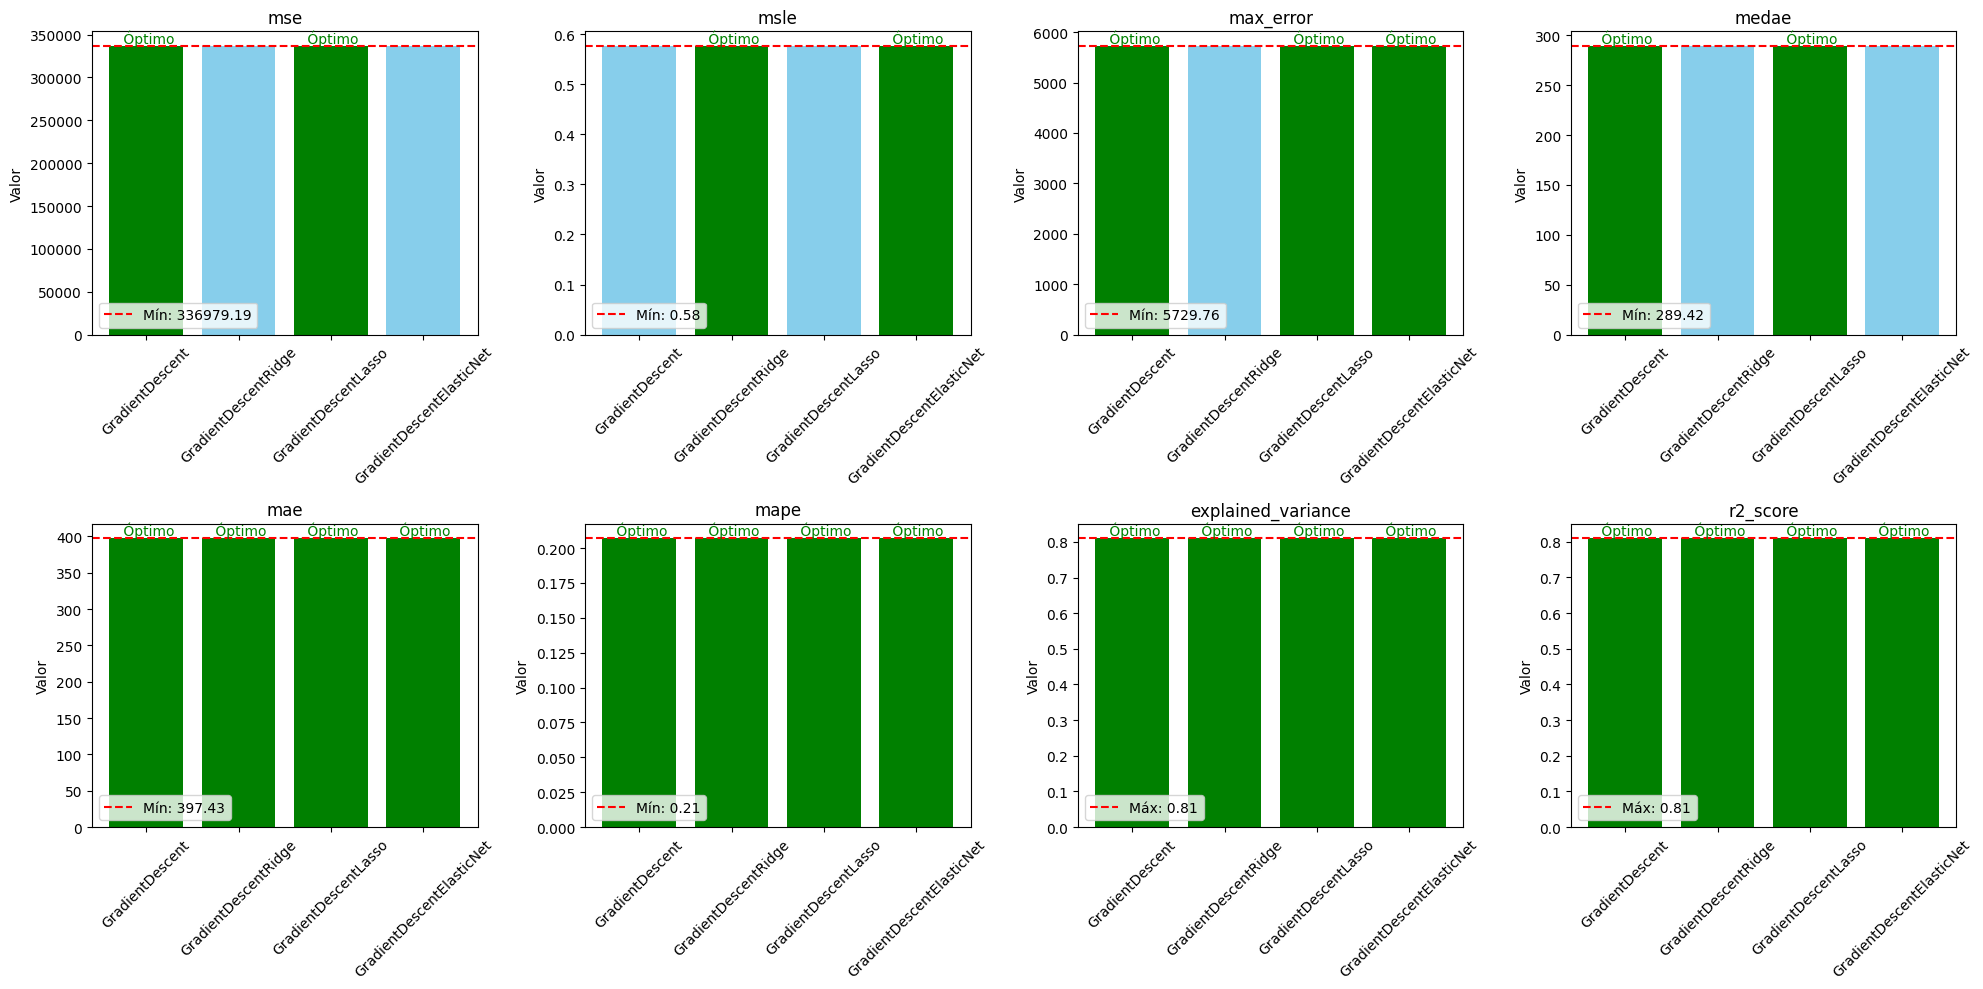

In [26]:
df = pd.DataFrame.from_dict(resultados_modelos, orient='index')
criterios = {
    'mse': 'min',
    'msle': 'min',
    'max_error': 'min',
    'medae': 'min',
    'mae': 'min',
    'mape': 'min',
    'explained_variance': 'max',
    'r2_score': 'max'
}
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, metric in enumerate(df.columns):
    ax = axs[i]
    values = df[metric]
    
    # Determinar el valor óptimo basado en el criterio definido
    if criterios[metric] == 'min':
        best_value = values.min()
    else:
        best_value = values.max()
    
    # Asignar colores: verde para el óptimo, azul para el resto.
    # Usamos np.isclose para comparar valores en punto flotante.
    colors = ['green' if np.isclose(val, best_value) else 'skyblue' for val in values]
    
    # Graficar las barras
    ax.bar(df.index, values, color=colors)
    ax.set_title(metric)
    ax.set_ylabel("Valor")
    ax.tick_params(axis='x', rotation=45)
    
    # Añadir una etiqueta sobre la barra óptima
    for j, model in enumerate(df.index):
        if np.isclose(values[model], best_value):
            ax.text(j, values[model], ' Óptimo', ha='center', va='bottom', color='green', fontsize=10)
    
    # Dibujar una línea horizontal de referencia con el valor óptimo
    if criterios[metric] == 'min':
        ax.axhline(best_value, color='red', linestyle='--', label=f'Mín: {best_value:.2f}')
    else:
        ax.axhline(best_value, color='red', linestyle='--', label=f'Máx: {best_value:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

### Conclusions
| Métrica            | Valor        | Mejor Modelo / Notas              |
|--------------------|--------------|-----------------------------------|
| mse                | 336979.1863  | GradientDescent                   |
| msle               | 0.5772       | All 4 have the same value         |
| max_error          | 5729.7603    | GradientDescent                   |
| medae              | 289.4199     | GradientDescent / Lasso           |
| mae                | 397.4303     | GradientDescent / Lasso           |
| mape               | 0.2070       | All 4 have the same value         |
| explained_variance | 0.8102       | All 4 have the same value         |
| r2_score           | 0.8098       | All 4 have the same value         |


## Authors:
- Caballero Coll Alejandro
- Chiquete Ayala Paulina
- Dominguez Jaber Teresa Estefania 
- Monroy Minero Diego
- Valbuena Novelo Alan Alberto